In [70]:
# https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv('./data/regression/data_1d.csv',header=None,names=['X','Y'])

In [45]:
df.head()

,X,Y
0,95.724162,197.179636
1,35.757619,67.590670
2,28.816847,60.854133
3,99.958481,196.907397
4,66.809748,125.311129


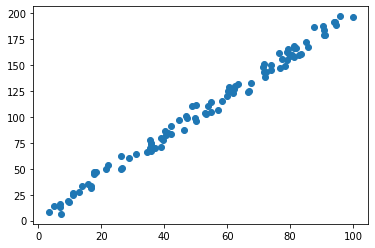

In [46]:
plt.scatter(df.X,df.Y)

## our equation

## $ \hat{y} = {a}{x}_{i} + {b} $

## Sum of squared error

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} $

## minimise the error

## $ {E} = \sum \limits_{i=1}^{n}(y_{i} - ({a}{x}_{i} + {b}))^{2} $

## derivative of E wrt a

## $ 
	\frac{\partial E}{\partial a} = \sum \limits_{i=1}^{n}2(y_{i} - {a}{x}_{i} + {b})({-x}) = {0}
$

## $
  -\sum \limits_{i=1}^{n}{y}_{i}{x}_{i} + {a}\sum \limits_{i=1}^{n}{x}_{i}^{2} + {b}\sum \limits_{i=1}^{n}{x}_{i} = 0
$

## derivative of E wrt a

## $
  -\sum \limits_{i=1}^{n}{y}_{i} + {a}\sum \limits_{i=1}^{n}{x}_{i} + {b}\sum \limits_{i=1}^{n}{1} = 0
$

## $
  {a} = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2}
$

## $
  {b} = \frac{\bar{y}\bar{x^2} - \bar{x}\bar{xy}}{\bar{x^2} - \bar{x}^2}
$

## code

In [67]:
denominator = df.X.dot(df.X) - df.X.mean()*df.X.sum()
a = (df.X.dot(df.Y) - df.Y.mean()*df.X.sum())/denominator
b = (df.Y.mean()*df.X.dot(df.X) - df.X.mean()*df.X.dot(df.Y))/denominator

In [68]:
Yhat = a*df.X + b

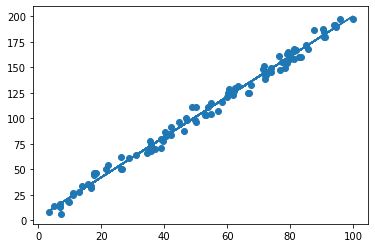

In [69]:
plt.scatter(df.X,df.Y)
plt.plot(df.X,Yhat)


In [22]:
denominator

90401.93430732115